# DALI Data Challenge

## 1. Data Visualization

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.dates as mdates
import shapefile as shp
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 7680x5760 with 0 Axes>

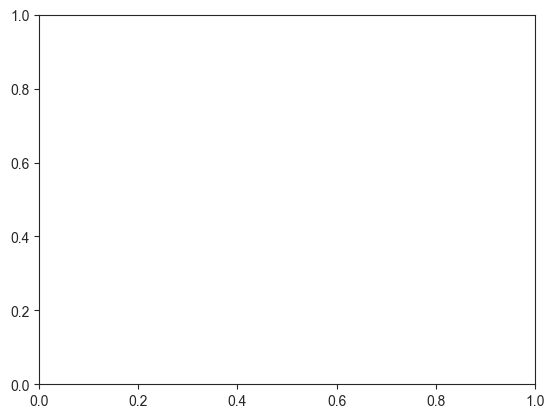

<Figure size 7680x5760 with 0 Axes>

In [83]:
# Setting Colors and Defaults 
lightblue='#8ecae6'
teal='#219ebc'
navy='#003049'
amber='#ffb703'
orange='#fb8500'
red='#c1121f'
darkred='#38040e'

plt.legend(frameon=False)
sns.set_style('ticks')
sns.set_palette('RdBu')
plt.figure(dpi=1200)

In [84]:
df = pd.read_csv('superstore.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.sort_values(by='Order Date', inplace = True) 
df['Region'].unique()
df['Order Year-Month'] = df['Order Date'].map(lambda dt: dt.strftime('%Y-%m'))
# df['Week'] = df['Order Date'].dt.isocalendar().week
# df['Day of Week'] = df['Order Date'].day_name()
df['Order Year-Week'] = df['Order Date'].dt.strftime('%Y-%V')

df['date'] = pd.to_datetime(df['Order Date']) - pd.to_timedelta(7, unit='d')
# we use this data later when we find trends and make predictions
weekly_data = df.groupby([pd.Grouper(key='date', freq='W')])['Quantity'].sum()

weekday_list = []
for x in df['Order Date']:
    y = x.weekday()
    weekday_list.append(y)
    
df['Weekday'] = weekday_list

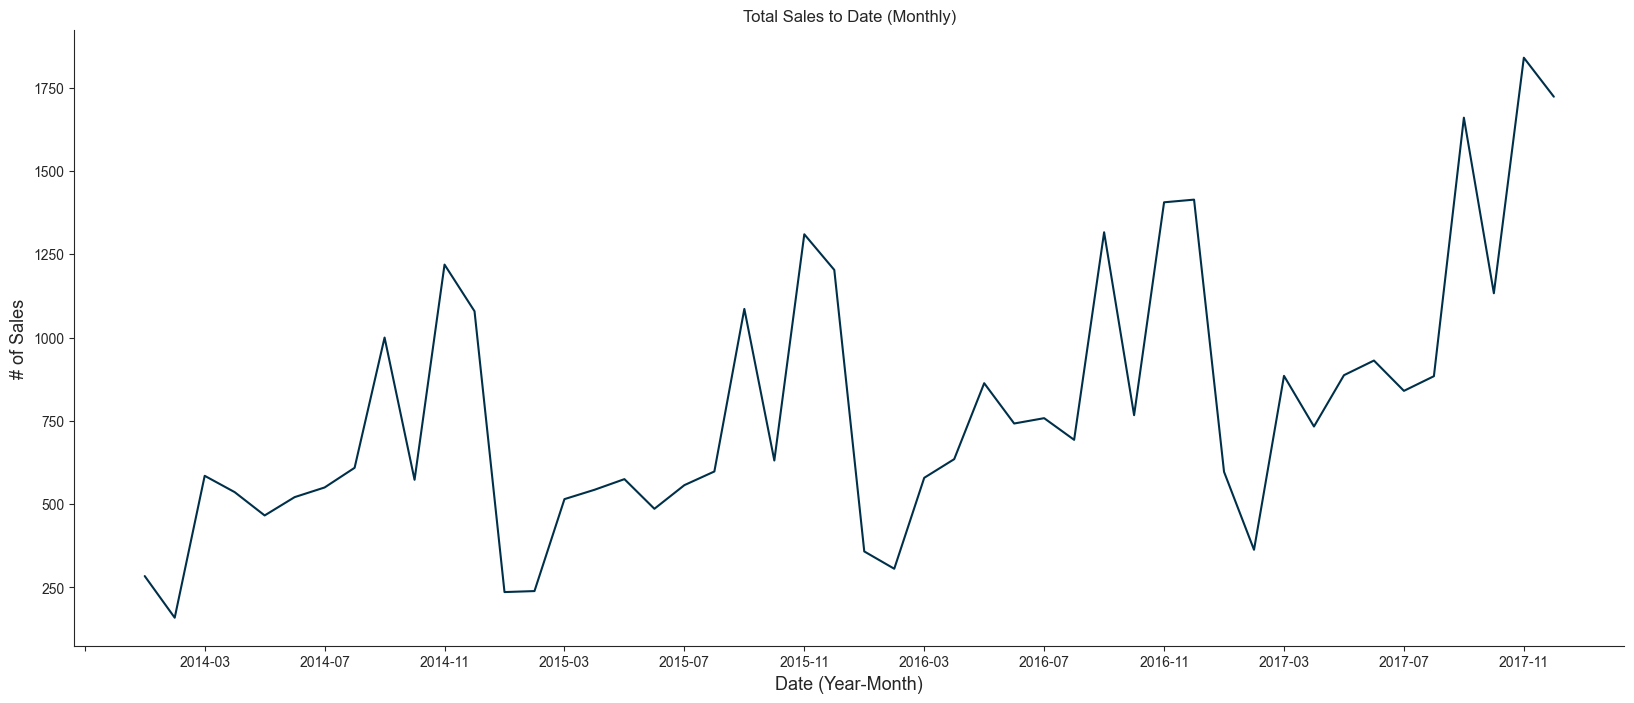

In [85]:
# All sales plotted
plt.figure(figsize=(20, 8))
plt.plot(df['Order Year-Month'].unique(), df.groupby('Order Year-Month')['Quantity'].aggregate('sum'), label='All Sales', color=navy)  

# set an x tick every 9 months 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.title('Total Sales to Date (Monthly)')
plt.xlabel('Date (Year-Month)', fontsize=13) 
# plt.xticks(rotation=90)
plt.ylabel('# of Sales', fontsize=13) 
sns.despine(top=True, right=True)

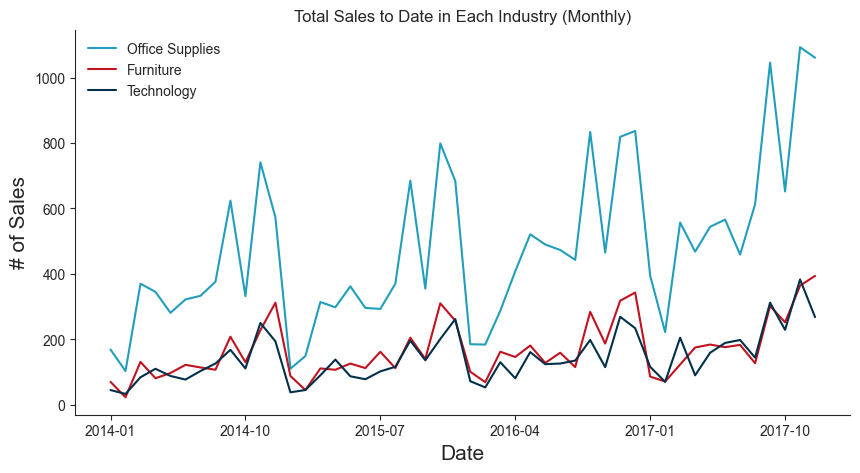

In [99]:
# Sales by Industry
plt.figure(figsize=(10, 5))
plt.plot(df[(df['Category']=='Office Supplies')]['Order Year-Month'].unique(), df[(df['Category']=='Office Supplies')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=teal, label='Office Supplies') 
plt.plot(df[(df['Category']=='Furniture')]['Order Year-Month'].unique(), df[(df['Category']=='Furniture')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=red, label='Furniture') 
plt.plot(df[(df['Category']=='Technology')]['Order Year-Month'].unique(), df[(df['Category']=='Technology')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=navy, label='Technology') 

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=9))

plt.title('Total Sales to Date in Each Industry (Monthly)')
plt.xlabel('Date', fontsize=15) 
plt.ylabel('# of Sales', fontsize=15) 
plt.legend(loc='upper left')
sns.despine(top=True, right=True)
plt.legend(frameon=False)


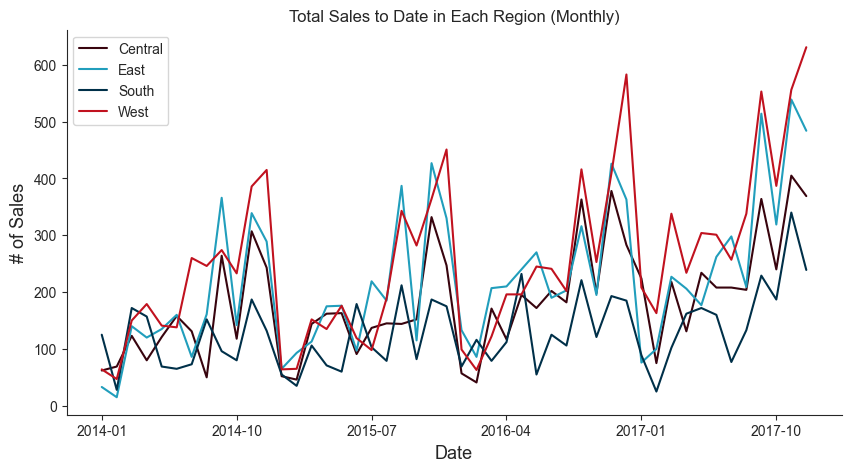

In [101]:
# Sales by Region
plt.figure(figsize=(10, 5))

plt.plot(df[(df['Region']=='Central')]['Order Year-Month'].unique(), df[(df['Region']=='Central')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=darkred, label='Central') 
plt.plot(df[(df['Region']=='East')]['Order Year-Month'].unique(), df[(df['Region']=='East')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=teal, label='East')  
plt.plot(df[(df['Region']=='South')]['Order Year-Month'].unique(), df[(df['Region']=='South')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=navy, label='South')   
plt.plot(df[(df['Region']=='West')]['Order Year-Month'].unique(), df[(df['Region']=='West')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=red, label='West') 

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=9))

plt.title('Total Sales to Date in Each Region (Monthly)')
plt.xlabel('Date', fontsize=13) 
plt.ylabel('# of Sales', fontsize=13) 
plt.legend(loc='upper left')
# plt.grid(alpha=.4)
sns.despine(top=True, right=True)

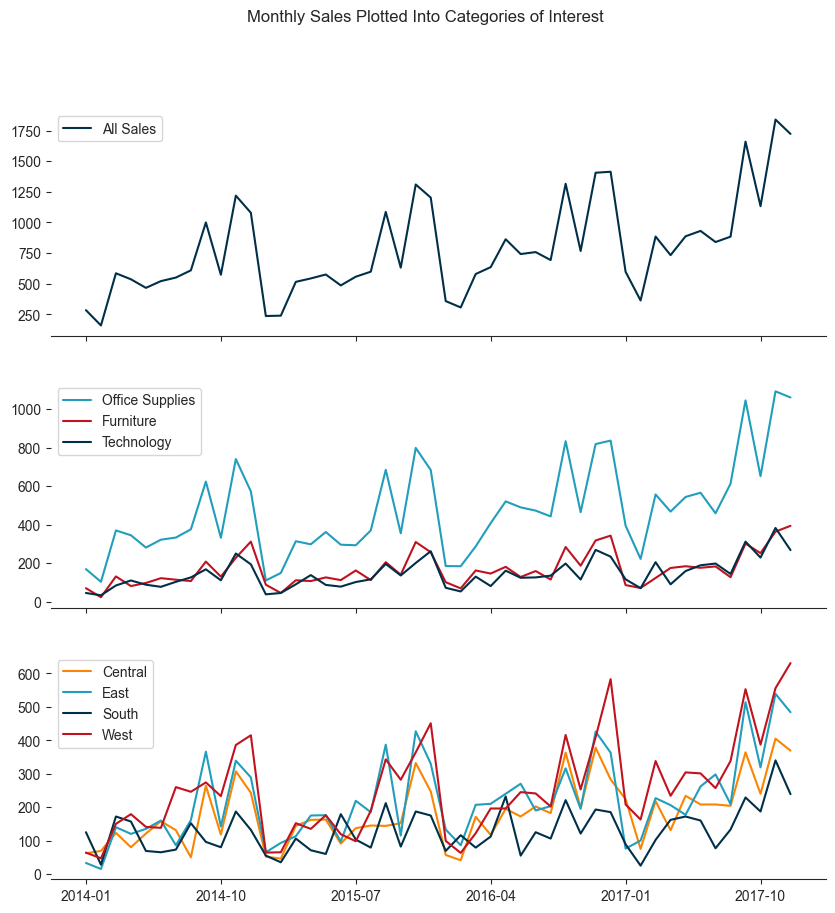

In [102]:
fig, axs = plt.subplots(3, sharex=True, figsize=(10,10))
fig.suptitle('Monthly Sales Plotted Into Categories of Interest')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=9))
axs[0].plot(df['Order Year-Month'].unique(), df.groupby('Order Year-Month')['Quantity'].aggregate('sum'), label='All Sales', color=navy)  

axs[1].plot(df[(df['Category']=='Office Supplies')]['Order Year-Month'].unique(), df[(df['Category']=='Office Supplies')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=teal, label='Office Supplies') 
axs[1].plot(df[(df['Category']=='Furniture')]['Order Year-Month'].unique(), df[(df['Category']=='Furniture')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=red, label='Furniture') 
axs[1].plot(df[(df['Category']=='Technology')]['Order Year-Month'].unique(), df[(df['Category']=='Technology')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=navy, label='Technology') 

axs[2].plot(df[(df['Region']=='Central')]['Order Year-Month'].unique(), df[(df['Region']=='Central')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=orange, label='Central')    
axs[2].plot(df[(df['Region']=='East')]['Order Year-Month'].unique(), df[(df['Region']=='East')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=teal, label='East')    
axs[2].plot(df[(df['Region']=='South')]['Order Year-Month'].unique(), df[(df['Region']=='South')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=navy, label='South')    
axs[2].plot(df[(df['Region']=='West')]['Order Year-Month'].unique(), df[(df['Region']=='West')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=red, label='West')

axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')
sns.despine(top=True, right=True, left=True)

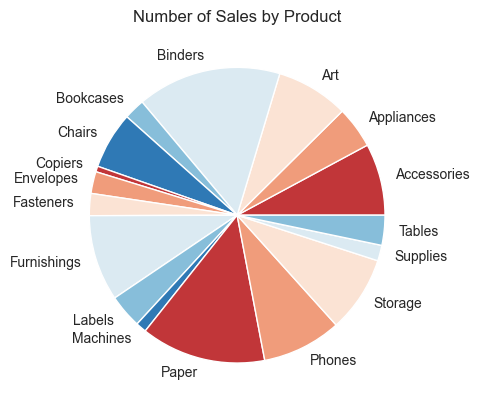

In [103]:
# Pie charts!
df.groupby(['Sub-Category'])['Quantity'].aggregate('sum').plot(kind='pie')
plt. ylabel("")
plt.title('Number of Sales by Product')
sns.despine(top=True, right=True)

In [104]:
continental_usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

state_sales = df[(df['Category']=='Office Supplies')].groupby(['State'], as_index=False)['Quantity'].aggregate('sum')
result = contiguous_usa.set_index('state').join(state_sales.set_index('State'))

result = result.fillna(0)

Text(0.5, 1.0, 'Quantity of Office Supplies Orders by State')

/Users/kpomm/opt/anaconda3/envs/phys31/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/Users/kpomm/opt/anaconda3/envs/phys31/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/Users/kpomm/opt/anaconda3/envs/phys31/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.



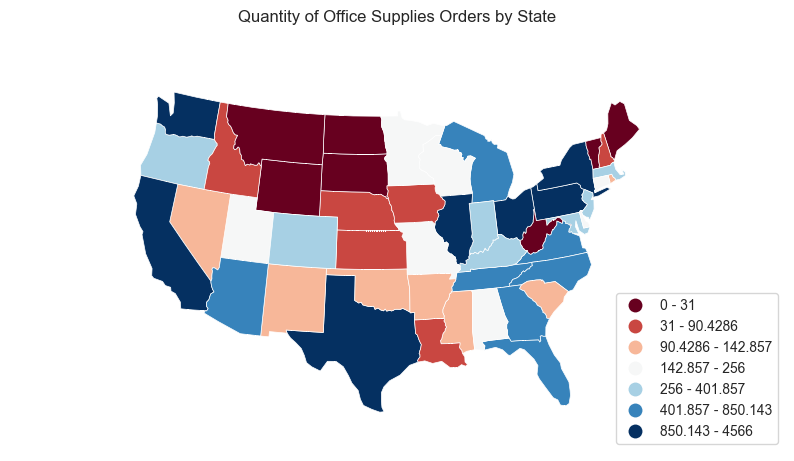

In [105]:
scheme = mc.Quantiles(result['Quantity'], k=7) # seven shades of color used 
# fig, ax = plt.subplots()

# cartogram -- plots the sales based on state on a map! 
ax = gplt.cartogram(
    result,
    scale='Quantity', 
    limits=(1,1),
    projection=gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
    hue='Quantity', cmap='RdBu', 
    scheme=scheme,
    linewidth=0.5,
    legend=True, legend_kwargs={'loc': 'lower right'}, legend_var='hue',
    figsize=(10, 7)
)
ax.margins(0)
ax.margins(x=0)
category = 'Office Supplies'
ax.set_title('Quantity of ' + category + ' Orders by State')

/var/folders/bz/ffk4_7b14dxf9m9bxxr_6xfw0000gn/T/ipykernel_65320/1343430167.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



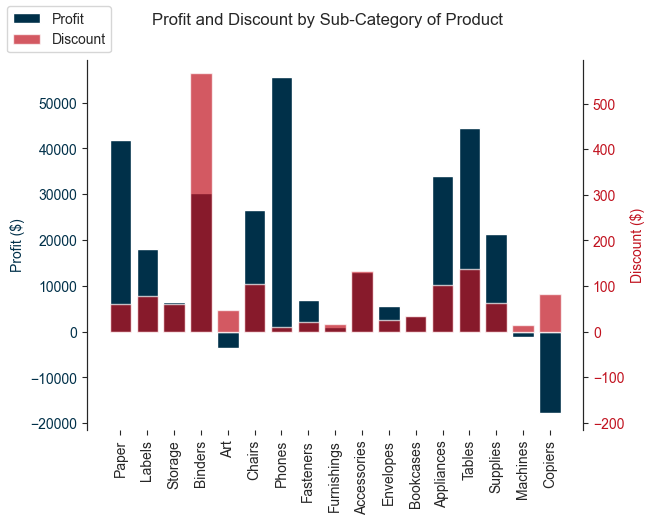

In [109]:
fig,ax = plt.subplots()

fig.suptitle('Profit and Discount by Sub-Category of Product')
ax.bar(df['Sub-Category'].unique(), df.groupby('Sub-Category')['Profit'].aggregate('sum'), color=navy, alpha=1, label='Profit')
ax.tick_params(axis='y', labelcolor=navy)
ax.set_xticklabels(df['Sub-Category'].unique(), rotation = 90)
ax.set_ylabel('Profit ($)', color=navy)


ax2=ax.twinx()
ax2.bar(df['Sub-Category'].unique(), df.groupby('Sub-Category')['Discount'].aggregate('sum'), color=red, alpha=0.7, label='Discount')
ax2.set_ylabel('Discount ($)', rotation=90, color=red)
ax2.tick_params(axis='y', labelcolor=red)

fig.legend(loc='upper left')

ax1_ylims = ax.axes.get_ylim()           # Find y-axis limits set by the plotter
ax1_yratio = ax1_ylims[0] / ax1_ylims[1]  # Calculate ratio of lowest limit to highest limit

ax2_ylims = ax2.axes.get_ylim()           # Find y-axis limits set by the plotter
ax2_yratio = ax2_ylims[0] / ax2_ylims[1]  # Calculate ratio of lowest limit to highest limit

if ax1_yratio < ax2_yratio: 
    ax2.set_ylim(bottom = ax2_ylims[1]*ax1_yratio)
else:
    ax.set_ylim(bottom = ax1_ylims[1]*ax2_yratio)
    
sns.despine(top=True, bottom=True, right=False)

/var/folders/bz/ffk4_7b14dxf9m9bxxr_6xfw0000gn/T/ipykernel_65320/3134045880.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



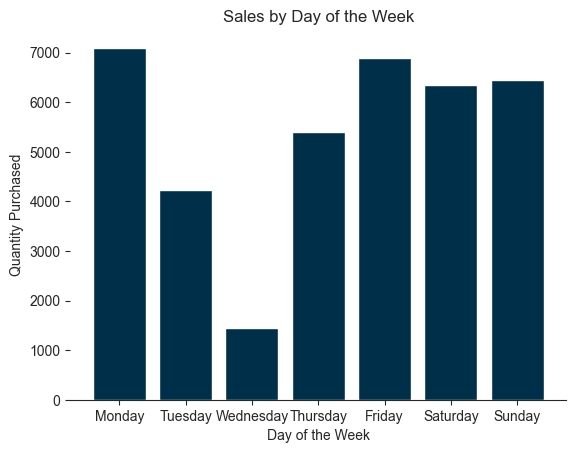

In [107]:
weekday_data = df.groupby('Weekday')['Quantity'].aggregate('sum')

fig,ax = plt.subplots()

ax.bar(weekday_data.index, weekday_data.values, color=navy)
ax.set_title('Sales by Day of the Week')
ax.set_ylabel('Quantity Purchased')
ax.set_xlabel('Day of the Week')
ax.set_xticklabels(['Monday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.despine(top=True, right=True, left=True)

## 2. Prophet

In [13]:
from prophet import Prophet

In [14]:
# series = df[(df['Sub-Category']=='Binders')].groupby('Order Date')['Quantity'].aggregate('sum')
series = df.groupby('Order Date')['Quantity'].aggregate('sum')
data = pd.DataFrame()
# data['ds'] = df[(df['Sub-Category']=='Binders')]['Order Date'].unique()
data['ds'] = weekly_data.index
data['y'] = weekly_data.values

TEST_SIZE = 52

train, test = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]

train = train.reset_index(drop = True)
test = test.reset_index(drop = True)

In [15]:
# # series = df[(df['Sub-Category']=='Binders')].groupby('Order Date')['Quantity'].aggregate('sum')
# series = df.groupby('Order Year-Month')['Quantity'].aggregate('sum')
# data = pd.DataFrame()
# # data['ds'] = df[(df['Sub-Category']=='Binders')]['Order Date'].unique()
# data['ds'] = df['Order Year-Month'].unique()
# data['y'] = series.values

# TEST_SIZE = 12

# train, test = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]

# train = train.reset_index(drop = True)
# test = test.reset_index(drop = True)

In [16]:
m = Prophet()
m.fit(train)

03:18:32 - cmdstanpy - INFO - Chain [1] start processing
03:18:33 - cmdstanpy - INFO - Chain [1] done processing


In [96]:
# create forecast
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import add_changepoints_to_plot
from statsmodels.tools.eval_measures import rmse

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)# create plots

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

predictions = forecast.iloc[-len(test):]['yhat']
actuals = test['y']

print(f"RMSE: {round(rmse(predictions, actuals))}")
plot_plotly(m, forecast, trend=True)

RMSE: 173


In [376]:
plot_components_plotly(m, forecast)

FigureWidgetResampler({
    'data': [{'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'trend',
              'type': 'scatter',
              'uid': '783b4099-b883-4430-8e8e-74133c0991e8',
              'x': array([datetime.datetime(2013, 12, 29, 0, 0),
                          datetime.datetime(2014, 1, 5, 0, 0),
                          datetime.datetime(2014, 1, 12, 0, 0), ...,
                          datetime.datetime(2017, 12, 23, 0, 0),
                          datetime.datetime(2017, 12, 24, 0, 0),
                          datetime.datetime(2017, 12, 25, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([126.948822  , 127.39116035, 127.83349869, ..., 222.62745939,
                          222.69477952, 222.76209965]),
              'yaxis': 'y'},
             {'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_upper',
              'ty

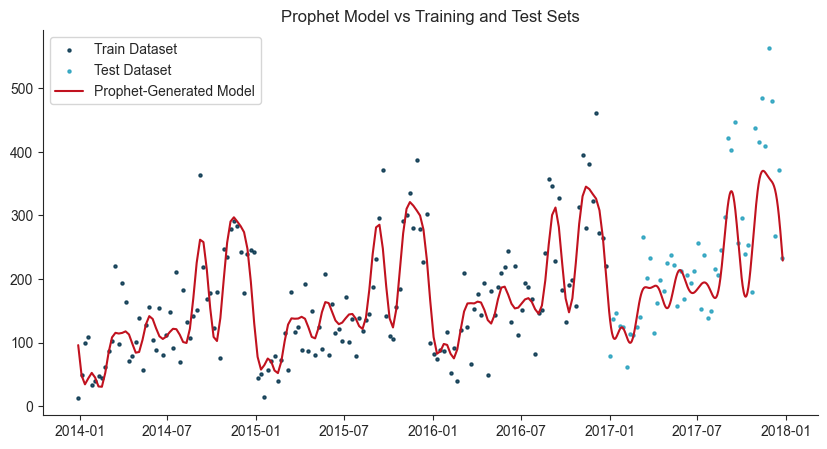

In [98]:
plt.figure(figsize=(10,5))
plt.title('Prophet Model vs Training and Test Sets')
plt.scatter(train['ds'], train['y'], color=navy, s=5, alpha=0.8, label='Train Dataset')
plt.scatter(test['ds'], test['y'], color=teal, s=5, alpha=0.8, label='Test Dataset')
plt.plot(forecast['ds'], forecast['yhat'], color=red, label='Prophet-Generated Model')
plt.legend(loc='upper left')
sns.despine(top=True, right=True)

# plt.ylim(-10, 100)